In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [24]:
bmv = pd.read_csv( "C:/Users/José Miguel/Documents/cecy/Diplomado/data-science-master/files/lec02/ipc0019.csv")
bmv.head()

,date,ticker,field,value
0,2017-06-07,BBAJIOO MF Equity,PX_LAST,29.50
1,2017-06-08,BBAJIOO MF Equity,PX_LAST,30.14
2,2017-06-08,BBAJIOO MF Equity,PX_LOW,29.75
3,2017-06-08,BBAJIOO MF Equity,PX_OPEN,29.50
4,2017-06-08,BBAJIOO MF Equity,PX_HIGH,30.70


In [25]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 3)

In [26]:
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])


cemex_close = pd.DataFrame(bmv["CEMEXCPO MF Equity"]["PX_LAST"])
print(cemex_close)

            PX_LAST
date               
2000-01-03     8.14
2000-01-04     7.62
2000-01-05     7.61
2000-01-06     7.50
2000-01-07     7.58
...             ...
2019-09-20     7.98
2019-09-23     7.84
2019-09-24     7.79
2019-09-25     7.78
2019-09-26     7.77

[4983 rows x 1 columns]


In [31]:
date_index = pd.to_datetime(cemex_close.index)
cemex_close.index = date_index
cemex_close["cemex_diff"] = cemex_close-cemex_close.shift()
cemex_close.assign(cemex_diff = cemex_close-cemex_close.shift())
cemex_close.head()

,PX_LAST,cemex_diff
date,,
2000-01-03,8.14,NaN
2000-01-04,7.62,-0.52
2000-01-05,7.61,-0.01
2000-01-06,7.50,-0.11
2000-01-07,7.58,0.08


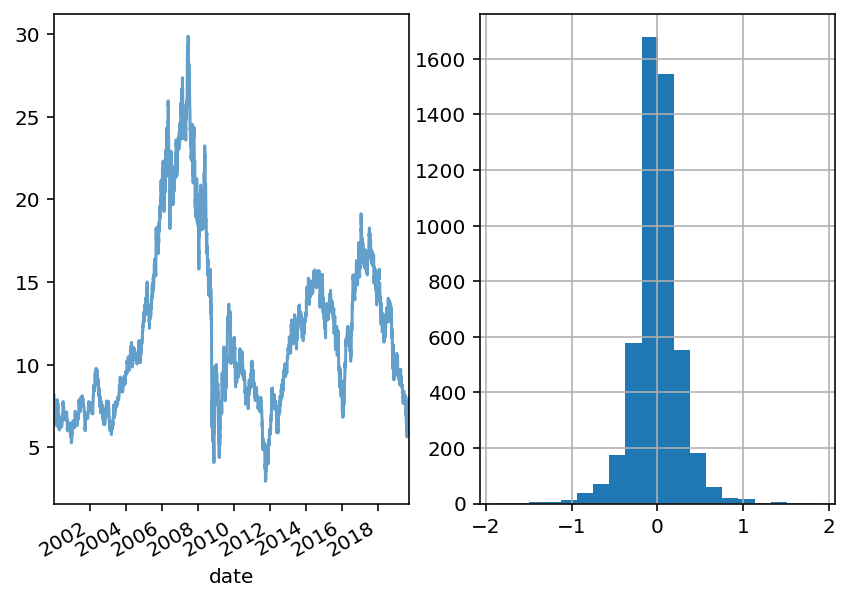

In [28]:
fig, ax = plt.subplots(1,2, figsize=(7, 5))
cemex_close["PX_LAST"].plot(ax = ax[0],label="IPC", alpha=0.7)
cemex_close["cemex_diff"].hist(ax = ax[1],label="IPC", bins= 20)

(array([10.,  6.,  9.,  8.,  9.,  4.,  5.,  5.,  3.,  1.,  2.,  2.,  3.,
         2.,  0.,  1.,  1.,  0.,  0.,  2.]),
 array([0.08835244, 0.11610764, 0.14386284, 0.17161804, 0.19937323,
        0.22712843, 0.25488363, 0.28263883, 0.31039403, 0.33814923,
        0.36590442, 0.39365962, 0.42141482, 0.44917002, 0.47692522,
        0.50468042, 0.53243561, 0.56019081, 0.58794601, 0.61570121,
        0.64345641]),
 <a list of 20 Patch objects>)

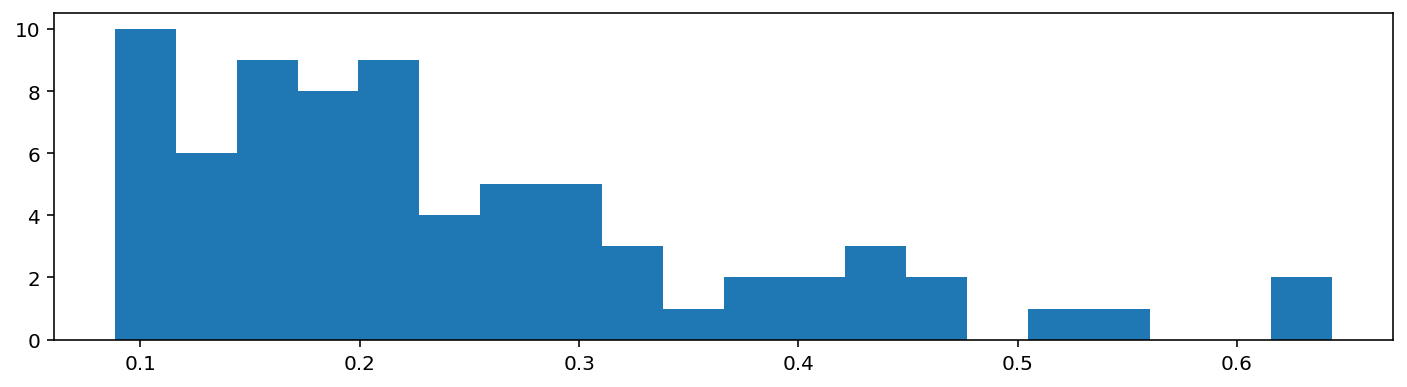

In [29]:
# Realiza un downsampling de cemex_diff: calcula la desviación estándar por 
#trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro 
#la variable cemex_std y grafica un histograma con bins=20
cemex_std = cemex_close.resample("Q").std().loc["2000-01-01": "2018-06-01","cemex_diff"]#[0]
plt.hist(cemex_std, bins=20 )



(array([157., 275., 221., 138.,  67.,  37.,  32.,  12.,  11.,   3.,   1.,
          2.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.01516575, 0.09292763, 0.17068951, 0.24845139, 0.32621327,
        0.40397515, 0.48173703, 0.55949891, 0.63726079, 0.71502267,
        0.79278455, 0.87054643, 0.94830831, 1.02607019, 1.10383207,
        1.18159395, 1.25935583, 1.33711771, 1.41487959, 1.49264147,
        1.57040335]),
 <a list of 20 Patch objects>)

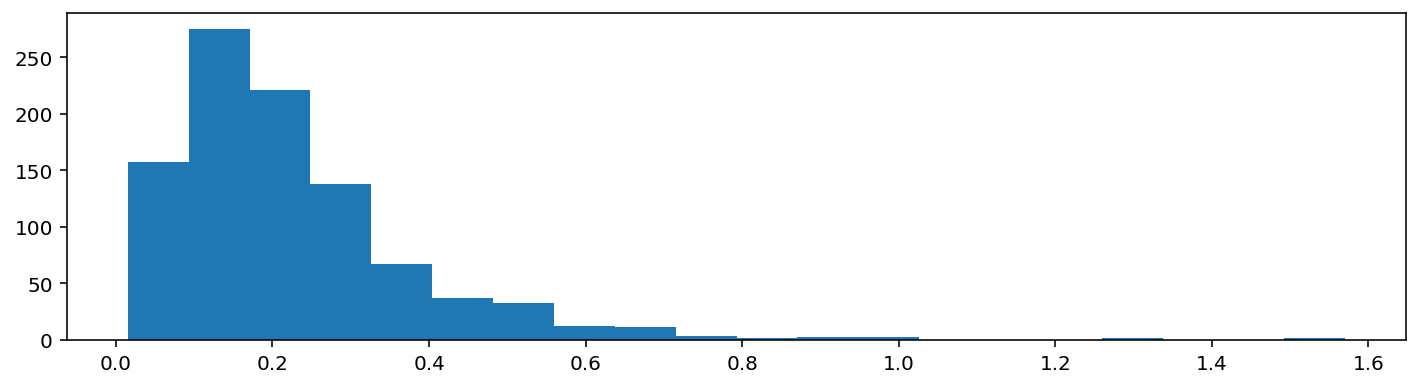

In [30]:
#Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. 
#¿Qué diferencias observas entre las dos distribuciones de volatilidad?

cemex_std_w = cemex_close.resample("W").std().loc["2000-01-04": "2018-06-01","cemex_diff"]#[0]
plt.hist(cemex_std_w, bins=20 )

#R = la distrubución al agrupar por semana muestra colas mucho más pesadas que al agrupar por trimestre.
#Esto es porque la volatilidad en el corto plazo tiene a ser más cam que en el largo plazo

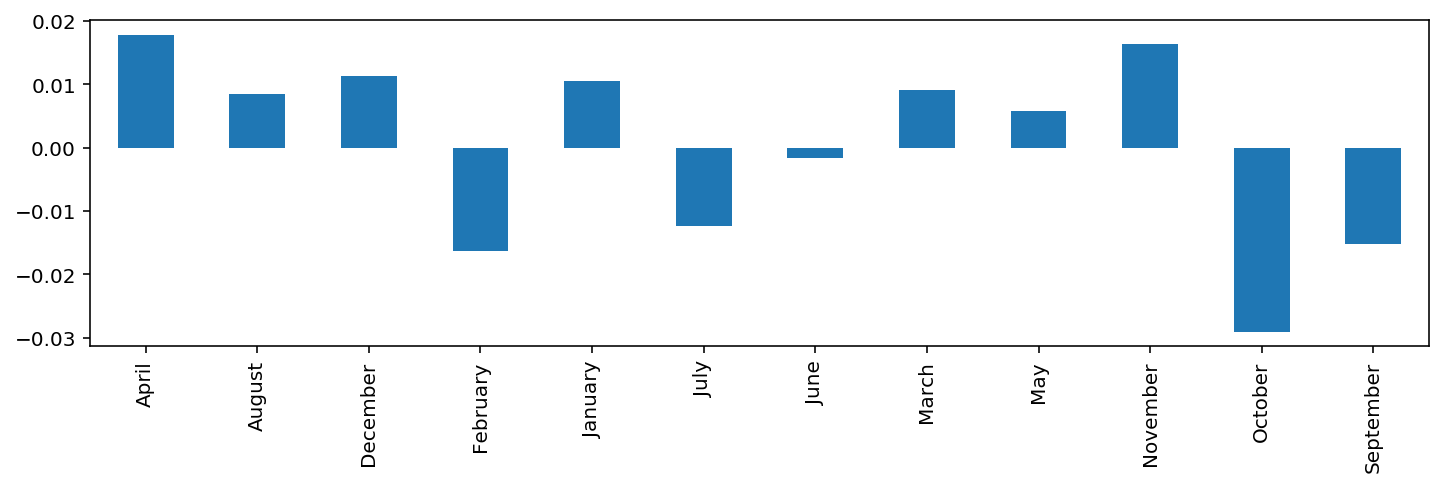

In [9]:
#En este ejercicio analizaremos la volatilidad por mes considerando cemex_diff. 
#Corre el siguiente código y explica que hace:
cemex_diff = cemex_close["cemex_diff"]
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
#¿Cómo podrías explicar la gráfica resultante?
# Se esta graficando la diferencia promedio del valor de a acción cada mes,tomado como al diferencia de valor de un día a otro.
#En promedio ha tenido una plusvalia, únicamente en octubre con su mayor depreciación, pero solo de .03
#A pesar de parecer que su diferencia no parece tener un valor constante, su rango de valores esta muy acotado.

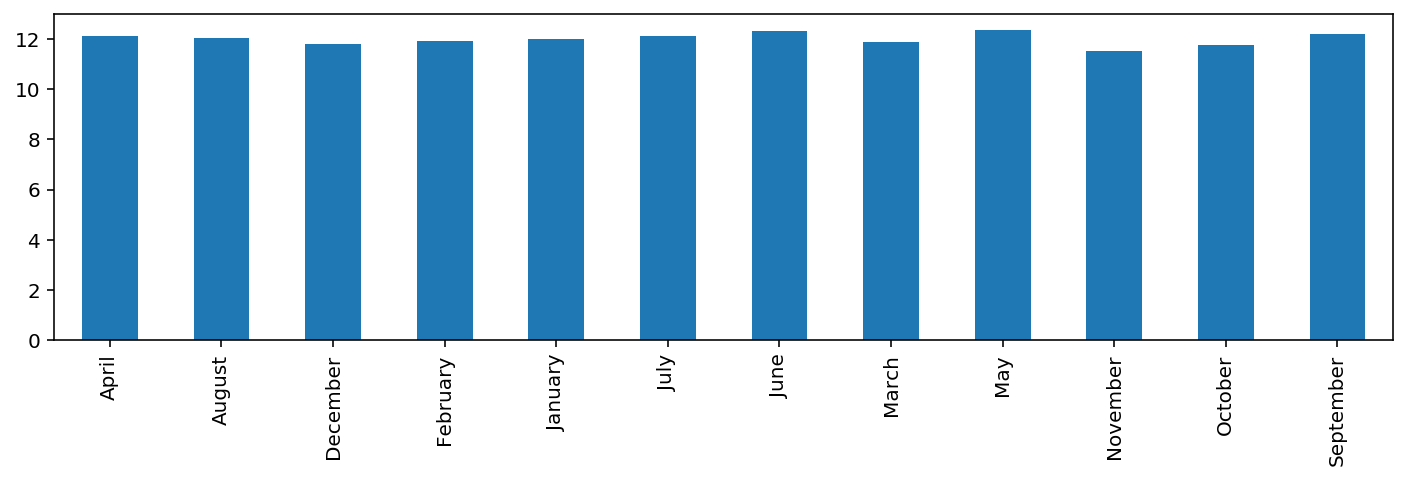

In [10]:
#Realiza nuevamente el ejercicio 4 considerando cemex_close. ¿Por qué difieren las gráficas?
PX_LAST = cemex_close["PX_LAST"]
months2 = PX_LAST.index.strftime("%B")
PX_LAST.groupby(months).mean().plot(kind="bar")
# Se esta graficando el valor promedio de cierre de la acción por cada mes.
# Esta grafica es consistente con la pasada, debido a que su valor promedio siempre esta alrededor de 12, por lo que
#se puede decir que el precio de la acción ha sido bastante estable a lo largo del tiempo (poca volatilidad)

In [34]:
import os
print (os.getcwd())

C:\Users\José Miguel
